In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv (r"/content/spg.csv")
print(df)
print(df.info())
print(df.columns)

      temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          1035.1                      0.0 

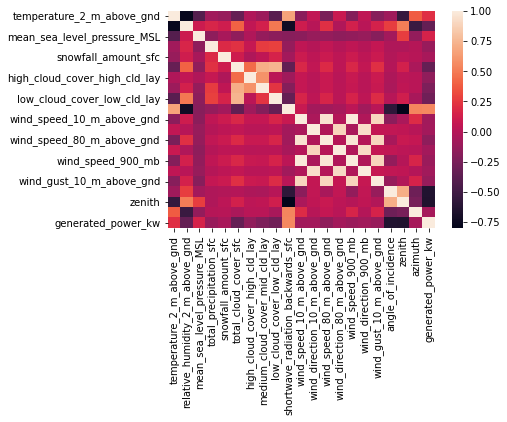

In [2]:
corr=df.corr()
sns.heatmap(corr)
plt.show()

In [3]:
X=df.iloc[:,:21]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)

(4213, 21)
(4213,)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3370, 21)
(843, 21)
(3370,)
(843,)


In [5]:
y_test=pd.DataFrame(y_test)
y_test.reset_index(inplace=True)
y_test.drop("index",inplace= True,axis=1)
print(y_test)

     generated_power_kw
0            742.304610
1             24.005640
2           1883.061400
3           1785.292400
4             16.687533
..                  ...
838         2224.327700
839         2594.873900
840         2469.055800
841          557.363060
842          479.020230

[843 rows x 1 columns]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
lin=LinearRegression()
lin.fit(X_train,y_train)

lin_pred=lin.predict(X_test)
lin_pred=pd.DataFrame(lin_pred )
lin_pred.columns=["lin_pred"]

In [7]:
bag=BaggingRegressor()
boost=AdaBoostRegressor()
Xboost=GradientBoostingRegressor()

bag.fit(X_train ,y_train)
bag_pred=bag.predict(X_test)
bag_pred=pd.DataFrame (bag_pred )
bag_pred.columns=["bag_pred"]

boost.fit(X_train ,y_train )
boost_pred=boost.predict(X_test)
boost_pred=pd.DataFrame(boost_pred)
boost_pred.columns=["boost_pred"]

Xboost.fit(X_train ,y_train )
Xboost_pred=Xboost .predict(X_test)
Xboost_pred=pd.DataFrame (Xboost_pred )
Xboost_pred.columns=["Xboost_pred"]

y_result=pd.concat([y_test,lin_pred,bag_pred,boost_pred,Xboost_pred],axis=1)
print(y_result)

     generated_power_kw     lin_pred     bag_pred   boost_pred  Xboost_pred
0            742.304610   742.304610   744.104894   777.582434   752.381128
1             24.005640    24.005640    24.117140    84.689661    24.577435
2           1883.061400  1883.061400  1882.020200  1893.226474  1881.230279
3           1785.292400  1785.292400  1785.134600  1828.033846  1775.378033
4             16.687533    16.687533    16.420159    84.689661    17.814599
..                  ...          ...          ...          ...          ...
838         2224.327700  2224.327700  2225.389120  2272.113998  2231.148539
839         2594.873900  2594.873900  2595.777430  2633.314392  2593.938110
840         2469.055800  2469.055800  2469.783610  2483.640007  2470.555999
841          557.363060   557.363060   556.460712   498.812918   551.451443
842          479.020230   479.020230   481.042279   428.118574   478.632078

[843 rows x 5 columns]


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

rmse=cross_val_score(bag,X,y,scoring="neg_root_mean_squared_error")
print(rmse)

r2_lin=r2_score(y_test,lin_pred )
print(r2_lin )

r2_bag=r2_score(y_test,bag_pred )
print(r2_bag )

r2_boost=r2_score(y_test,boost_pred )
print(r2_boost)

r2_Xboost=r2_score(y_test,Xboost_pred)
print(r2_Xboost )

[-7.95716835 -2.28132637 -1.43220844 -1.30095669 -1.41327308]
1.0
0.9999974751245888
0.9956844122142906
0.9999634355097423
